# Data 422

Data Wrangling, S2 2019

## Assignement 1

**20% of final grade** Total marks is **100 marks** (70 for R, 30 for Julia).

## Due date: 11am Friday 23 August 2019

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own work**.

### Avoid plagiarism (see this [video on academic plagiarism](https://www.youtube.com/embed/reGGPUrEsC0) ). If you are not sure what may constitute code plagiarism, read this [explanation on source code plagiarism](http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism). Remember, when in doubt **declare your sources**. 

If you have any issues that affects your ability to work during the time allocated for the assignement, please DO CONTACT ME. We will find a suitable solution. In general this WON'T be an extension to the deadline (so that in the rest of the semester you are free from preoccupations). Most probably, I will ask you to submit what you have ready by the time the assignment is due, even if it is not everything we required, and I'll take into account special considerations. For any particular problem, please contact [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or the TAs (using keybase).

## Instruction

For this assignment you will work with a _.csv_ data-set. Your goal is to read it in, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter-lab R notebook (for the R part, and jupyter-lab Julia notebook for the Julia part) comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: no comments, no marks.  
You can either modify this notebook or write a new one from scratch: in that case, clearly indicate which question you are asking at each step. Notice that you may well want to **use more than one cell** per answer (using some cell for the code, some for the text, and so forth).

#### NOTE: For few parts of the assignment, I have worked along with Sidhartha - 58651262

## Comment, explain, present your work in a clear way (we may remove marks for messy notebooks)

## R part (overall 70 marks)

Do use the tidyverse syntax I introduced in class and labs. If in doubt, refresh the lab material 1 to 4.

The first thing you may want to do is to load **tidyverse**:

#### Reference - All the codes below has been taken from R-documentation and stack Overflow site. Most of the code has been taken from the lab material provided.

In [1]:
library(tidyverse)
library(dplyr)
library(skimr)
library(readr)
#library(vis_dat)
library(dbplyr)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'skimr'

The following object is masked from 'package:stats':

    filter


Attaching package: 'dbplyr'

The following objects are masked from 'package:dplyr':

    ident, sql



### Task (a): import (5 marks)

Import the **hour.csv** dataset into R as a dataframe (we'll call it `bike_df`, but you can call it what you want). You can read about the dataset in the file `DataSet_Dictionary.txt`. (Alternatively, you might use your own .csv dataset of choice, but talk with me about it before doing it). 

Then perform the routine checks about the types of the columns, the missing values, and output a quick summary of the dataset.

_hint_ useful functions: `read_csv()`, `glimpse()`  
_hint_ useful libraries: `tidyverse`, `readr`, `skimr`, `vis_dat`

In [20]:
# Loading the datatset
bike_df <- read.csv("hour.csv")
#taking a glimpse of the dataset or a summary which tells us if the variable is a factor 
bike_df %>% glimpse()



Observations: 17,379
Variables: 17
$ instant    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1...
$ dteday     <fct> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-...
$ season     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ yr         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ mnth       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ hr         <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16...
$ holiday    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ weekday    <int> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...
$ workingday <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ weathersit <int> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3,...
$ temp       <dbl> 0.24, 0.22, 0.22, 0.24, 0.24, 0.24, 0.22, 0.20, 0.24, 0....
$ atemp      <dbl> 0.2879, 0.2727, 0.2727, 0.2879, 0.2879, 0.2576, 0.2727, ...
$ hum        <dbl

In [58]:
# Gives the number of columns in the dataset
bike_df %>%
ncol()
#Gives the number of rows in the dataset
bike_df %>%
nrow()


[1] 17

[1] 17379

In [22]:
#Another way to explore the dataset  
bike_df %>% skim()%>%kable()

Skim summary statistics  
 n obs: 17379    
 n variables: 17    

Variable type: factor

| variable | missing | complete |   n   | n_unique |             top_counts             | ordered |
|----------|---------|----------|-------|----------|------------------------------------|---------|
|  dteday  |    0    |  17379   | 17379 |   731    | 201: 24, 201: 24, 201: 24, 201: 24 |  FALSE  |

Variable type: integer

|  variable  | missing | complete |   n   |  mean  |   sd    | p0 |  p25   | p50  |   p75   | p100  |   hist   |
|------------|---------|----------|-------|--------|---------|----|--------|------|---------|-------|----------|
|   casual   |    0    |  17379   | 17379 | 35.68  |  49.31  | 0  |   4    |  17  |   48    |  367  | <U+2587><U+2582><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581> |
|    cnt     |    0    |  17379   | 17379 | 189.46 | 181.39  | 1  |   40   | 142  |   281   |  977  | <U+2587><U+2585><U+2582><U+2582><U+2581><U+2581><U+2581><U+2581> |
|  holiday   |    0   

#### Missing Value Plot

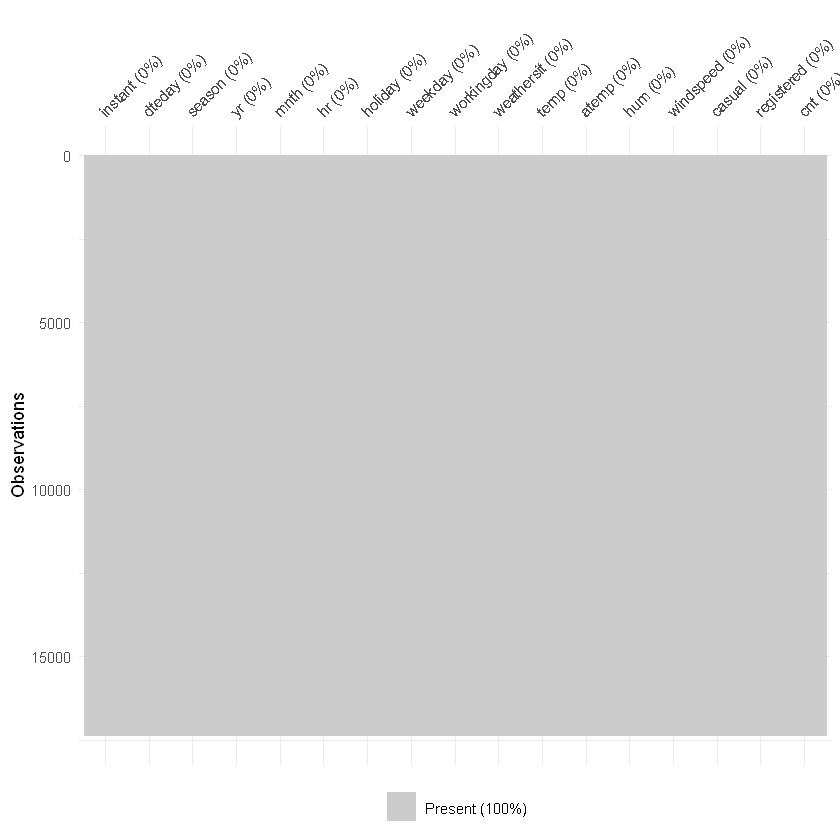

In [23]:
library(visdat)
#plot for the missing value for the given dataset. By the plot we can see no missng values.
bike_df %>% vis_miss(cluster=TRUE)

In [11]:
#Giving the count of missing values
bike_df %>% is.na()%>%sum()

[1] 0

### Task (b): working on rows (10 marks)


Working on `bike_df`, show that you can operate on rows: arranging them, getting the top _n_ according to some variable of your choice, filtering them (eventually using your own functions).

_hint_ useful functions: `arrange()`, `top_n()`, `filter()`  
_hint_ to define a function: `myfunction <- function(myargument,anotherargument) { bodyofthefunction }`

In [19]:
# Taking the column casual from the dataset hour and then choosing only the top 10 values. Then I have arranged it in descending order. 
func <- function(bike_df){
    
       bike <-  bike_df %>% 
            select(casual) %>%
                top_n(10) %>% 
                    arrange(desc(casual))
        return(bike)

}
    
func(bike_df)

Selecting by casual


casual
<int>
367
362
361
357
356
355
354
352
350


In [13]:
#Finding the dataframe based on season equivalent to 1
bike_df %>% 
    filter(season == 1)  
        

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


In [14]:
# 2012, holidays , total no. of users
myfunction <- function(sel){
        sum = 0
    sel_length <- length(sel)
 
    for(i in 1:sel_length){
       
        sum = sum + sel[i]
   }
    

    return(sum)
    
    
}


 

In [55]:
# Finding the sum of the cnt column for holidays in year 2012 by calling the function myfunction()
sel <-  bike_df %>% select(workingday,cnt,yr) %>%
    filter(workingday == 1 & yr == 1) %>% select(cnt) 

sel[[1]] %>%
myfunction()

[1] 1436146

In [15]:
# Multiplying temp columns with 41 respectively to get the original values of the temperature.
# For this I have used function

temp <- function(temp_value,atemp_value){
   len <- length(temp_value)
    for(i in 1:len){
        temp_value[i] =  temp_value[i] * 41
        
    }
       
        return (temp_value)
}

temp_value <- bike_df %>% select(temp) 
 
temp(temp_value)



temp
<dbl>
9.84
9.02
9.02
9.84
9.84
9.84
9.02
8.20
9.84


In [ ]:
# Giving summary
summary <- bike_df %>%
    select(workingday,cnt,yr) %>%
        group_by(yr==1 & workingday==1) %>%
            summarise(avg=mean(cnt),total=sum(cnt))
summary

In [ ]:
# The below code gives us the count of total rental bikes including both casual and registered users
# when the normalized temperature is below 0.51 in celcius
# Rental bikes are used more at higher temperature than in lower temperature as the 
# count of the rental bikes are more at higher temperature.
myfunc <- function(data,cnt){
    dl <- length(data)
    sum = 0
    sum1 = 0
    for(i in 1:dl){
        if(data[i]<0.51){
            sum = sum + cnt[i]
        }
        else{
            sum1 = sum1 + cnt[i]
        }
        
    }
    l = c(sum,sum1)
    return(l)
}

In [ ]:
tmp <- bike_df %>% 
    select(temp,cnt) 


myfunc(tmp[[1]],tmp[[2]])       

### Task (c): working on columns (10 marks)

Working on `bike_df`, show that you can operate on columns: selecting some of them, dropping other, renaming them, reordering them, ...


_hint_ useful functions: `select()`, `rename()`, ...

In [ ]:
# Median of the total count of the rental bikes (cnt column) including both casual and registered users.
bike_df %>%
  summarise(median_cnt = median(cnt))

In [ ]:
#selecting particular columns:
bike_df %>%
  select(dteday,weekday,cnt) %>% tail()

In [ ]:
#reordering the columns
bike_df %>%
  select(weekday,cnt, dteday) %>% tail()

In [ ]:

# renaming column dteday to date. Using function rename() for the renaming of the column
rename1 %>% tail()
rename1 <- bike_df %>%                     
        rename(year ='yr', month='mnth', date = 'dteday')


In [60]:
# Droppping the column date from the data frame 

library(dplyr)
bike_df %>%
    select (-c(date)) %>%
tail()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
17374,17374,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17375,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17378,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17379,17379,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [50]:
# Reordering the columns and saving under the name bike_df2
bike_df2 <- bike_df[c(1,3,4,2,5,8,7,9,13,10,12,11,15,16,14,6)]
bike_df2

instant,season,yr,dteday,mnth,weekday,holiday,workingday,hum,weathersit,atemp,temp,casual,registered,windspeed,hr
<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
1,1,0,2011-01-01,1,6,0,0,0.81,1,0.2879,0.24,3,13,0.0000,0
2,1,0,2011-01-01,1,6,0,0,0.80,1,0.2727,0.22,8,32,0.0000,1
3,1,0,2011-01-01,1,6,0,0,0.80,1,0.2727,0.22,5,27,0.0000,2
4,1,0,2011-01-01,1,6,0,0,0.75,1,0.2879,0.24,3,10,0.0000,3
5,1,0,2011-01-01,1,6,0,0,0.75,1,0.2879,0.24,0,1,0.0000,4
6,1,0,2011-01-01,1,6,0,0,0.75,2,0.2576,0.24,0,1,0.0896,5
7,1,0,2011-01-01,1,6,0,0,0.80,1,0.2727,0.22,2,0,0.0000,6
8,1,0,2011-01-01,1,6,0,0,0.86,1,0.2576,0.20,1,2,0.0000,7
9,1,0,2011-01-01,1,6,0,0,0.75,1,0.2879,0.24,1,7,0.0000,8


### Task (d): groups and not (10 marks)

Working on `bike_df`, show that you can produce new variables (columns) and modify existing one; show also that you can operate on the dataframe as a whole and on groups. See *Readme.txt* to get an understanding of the variable scaling applied.

_hint_ useful functions: `mutate()`, `group_by()`, `summarise()`, `tally()`, ...

In [75]:
# Grouping the count of Rental bikes based on the season gives us the below result which shows us that median of
# the count of the rental bikes is highest for season 3 that is fall season and least for spring season.
bike_df %>%
  group_by(season) %>%
  summarise(median_cnt = median(cnt)) %>%
  head()



season,median_cnt
<int>,<dbl>
1,76.0
2,165.0
3,199.0
4,155.5


#### <span style="color:blue"> COMMENT:  </span>
In the below plot we are grouping the count of the rental bikes according to the season. There are four seasons Spring, summer, fall and winter. On finding the mean of the count for each group of the season, we observe from the below plot that on an average the bikes are rented more in the fall season and least in the spring season.

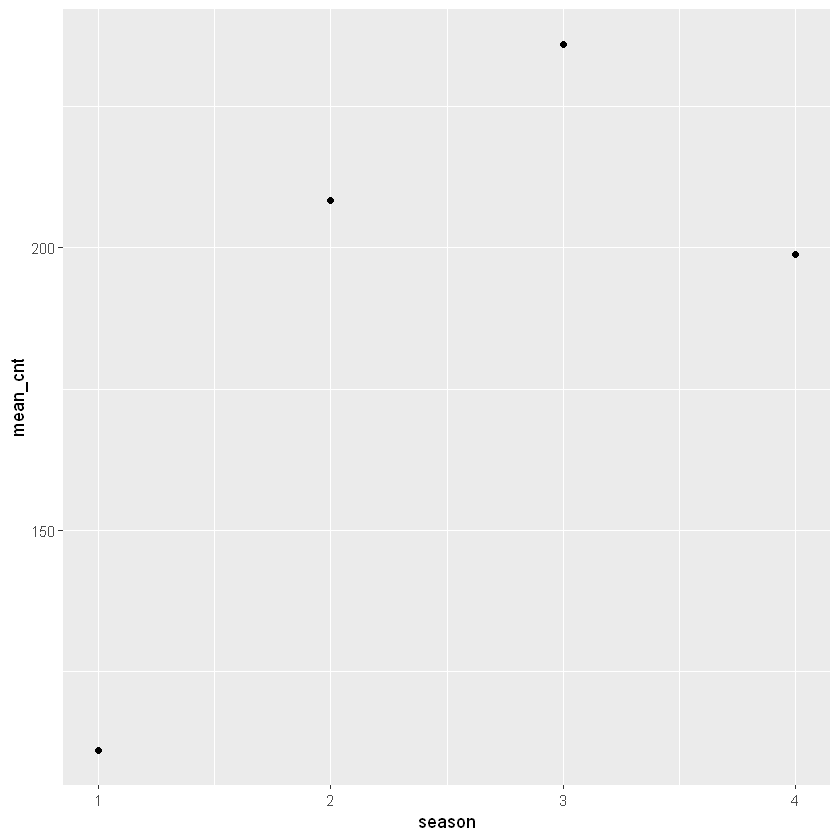

In [6]:
bike_df %>%
  group_by(season) %>%
  summarise(mean_cnt = mean(cnt)) %>%
  ggplot(aes(x = season, y = mean_cnt)) +
  geom_point() 

In [51]:
# Mutate : multipying humidity and feeling temperature which creates a new column called y_mutate
bike_df %>%
 mutate(y_mutate = atemp * hum) %>%
 head()   


  

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,y_mutate
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0.233199
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0.218160
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0.218160
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0.215925
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0.215925
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,0.193200


#### <span style="color:blue"> COMMENT: </span>
Tally : In the below code The observations for different weather conditions are being tallied and here the observations are being tallied based on weathersit or different weather conditions.We find in the below output, that the observations are least when the weather condition is - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog Number of observations are highest when the climate condition is Clear, Few clouds and Partly cloudy

In [63]:
bike_df %>%group_by(weathersit) %>%  tally(sort = TRUE)

# count does same thing as tally but we need not do grouping here
bike_df %>% count(weathersit)

weathersit,n
<int>,<int>
1,11413
2,4544
3,1419
4,3


weathersit,n
<int>,<int>
1,11413
2,4544
3,1419
4,3


### Task (e): wide, long, tidy (10 marks)

Show that you can go back and forth between the long and the wide format of a dataframe. Then produce a tidy version of `bike_df` (or, if you think the original one is is already in the tidy data shape, explain why).

_hint_ useful functions: `spread()`, `gather()`, `na.omit()`, ...

#### <span style="color:blue"> COMMENT: </span>
The dataset given to us is in the long format hence to change it to wide we need to use the function spread() we are spreading the dataframe based on the column working day and the values it will contain is the total count of the rental bikes.

In [71]:

wide <- bike_df %>% 
    spread(key = workingday,
         value = cnt) 
wide %>% tail()
wide  %>% nrow()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,0,1
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
17374,17374,2012-12-31,1,1,12,18,0,1,2,0.26,0.2727,0.48,0.1343,10,112,NA,122
17375,17375,2012-12-31,1,1,12,19,0,1,2,0.26,0.2576,0.60,0.1642,11,108,NA,119
17376,17376,2012-12-31,1,1,12,20,0,1,2,0.26,0.2576,0.60,0.1642,8,81,NA,89
17377,17377,2012-12-31,1,1,12,21,0,1,1,0.26,0.2576,0.60,0.1642,7,83,NA,90
17378,17378,2012-12-31,1,1,12,22,0,1,1,0.26,0.2727,0.56,0.1343,13,48,NA,61
17379,17379,2012-12-31,1,1,12,23,0,1,1,0.26,0.2727,0.65,0.1343,12,37,NA,49


[1] 17379

#### <span style="color:blue">COMMENT:</span>
Changing the wide dataframe to long. For this gather() function is being used. This function gathers data from the  columns specified and then put it under the columns workingday and cnt. During this process many count columns are assigned as NA. For a given cnt value, it can be workingday as 0 or 1 but gather takes both the values of wrkingday and tries assigning some cnt to it, hence few cells under cnt are assigned NA. Thus applying na.omit() function is required to get the exact long dataframe.

In [70]:

long <- wide %>%
    gather(key = workingday,
         value = cnt, 16:17)

long_omitted <- long %>%
na.omit()

long_omitted %>% tail()

long_omitted %>% nrow()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,workingday,cnt
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>
34753,17374,2012-12-31,1,1,12,18,0,1,2,0.26,0.2727,0.48,0.1343,10,112,1,122
34754,17375,2012-12-31,1,1,12,19,0,1,2,0.26,0.2576,0.60,0.1642,11,108,1,119
34755,17376,2012-12-31,1,1,12,20,0,1,2,0.26,0.2576,0.60,0.1642,8,81,1,89
34756,17377,2012-12-31,1,1,12,21,0,1,1,0.26,0.2576,0.60,0.1642,7,83,1,90
34757,17378,2012-12-31,1,1,12,22,0,1,1,0.26,0.2727,0.56,0.1343,13,48,1,61
34758,17379,2012-12-31,1,1,12,23,0,1,1,0.26,0.2727,0.65,0.1343,12,37,1,49


[1] 17379

In [74]:
# getting the same answer when applying this operation to original dataframe.
long_omitted %>%
  group_by(season) %>%
  summarise(median_cnt = median(cnt)) %>%
  head()


season,median_cnt
<int>,<dbl>
1,76.0
2,165.0
3,199.0
4,155.5


##### Reference: https://r4ds.had.co.nz/tidy-data.html --> for the below statements

#### <span style="color:blue"> COMMENT - TIDY DATASET</span> 
The dataset provided to us has column yr and mnth which gives same information as dteday. The column dteday has month as well as year in it. Thus, We can remove these two redundant columns. The dataset provided can be called as tidy as there are three ways in which we can tell the dataset is tidy and these are as follows- <br/> 1) Each variable must have its own column <br/> 2) Each observation must have its own row <br/> 3) Each value must have its own cell.
The columns mnth and yr are redundant as it is present in the column dteday hence can drop these columns. 
We can also create levels for the columns weekday, workingday and holiday by combining these columns into 1 column. However this will lead to 12 levels for a single column. And as it is not recommendable to have more than 10 levels for factors in a dataset. I have not created these levels in my tidy dataset.

In [4]:
# Getting tidy dataset
Tidy_Data <- bike_df[,-4:-5]
    
Tidy_Data %>% tail()

,instant,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
17374,17374,2012-12-31,1,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17375,17375,2012-12-31,1,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,17376,2012-12-31,1,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,17377,2012-12-31,1,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17378,17378,2012-12-31,1,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17379,17379,2012-12-31,1,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Task (f): plot (10 marks)

Produce a beautiful graphical representation of the data in `bike_df` or of _some_ of the data in `bike_df`. You can try different geometries, themes, mappings, ... . Make sure you label the plots with titles, and axis labels. Notice that the focus is on the use of *plotting as a data model*, rather than on the *statistical modelling* of the data.
\[ Hint: if you can't find any plotting idea, try focusing on the count of total rental bikes, and how it varies through time, season, weather, temperature, humidty, wind-speed. \]

_hint_ useful functions: `ggplot()`, `ylab()`, `xlab()`, `geom_...()`, `aes()`, `facet_...()`, ...

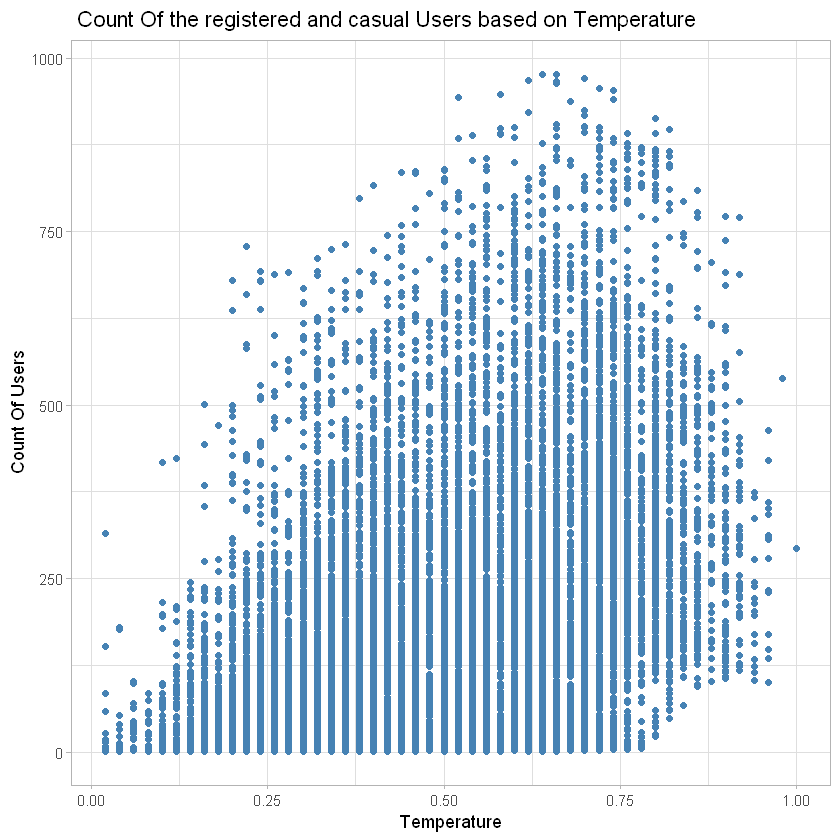

In [7]:
plot1 <- bike_df %>% 
  ggplot(mapping = aes(x = temp, # your x variable
                        y = cnt)) + # your y variable
  geom_point(colour = "steelblue") + # plotted as points 
    labs(x = "Temperature" , y = "Count Of Users", title = " Count Of the registered and casual Users based on Temperature") +
    theme_light()

plot1

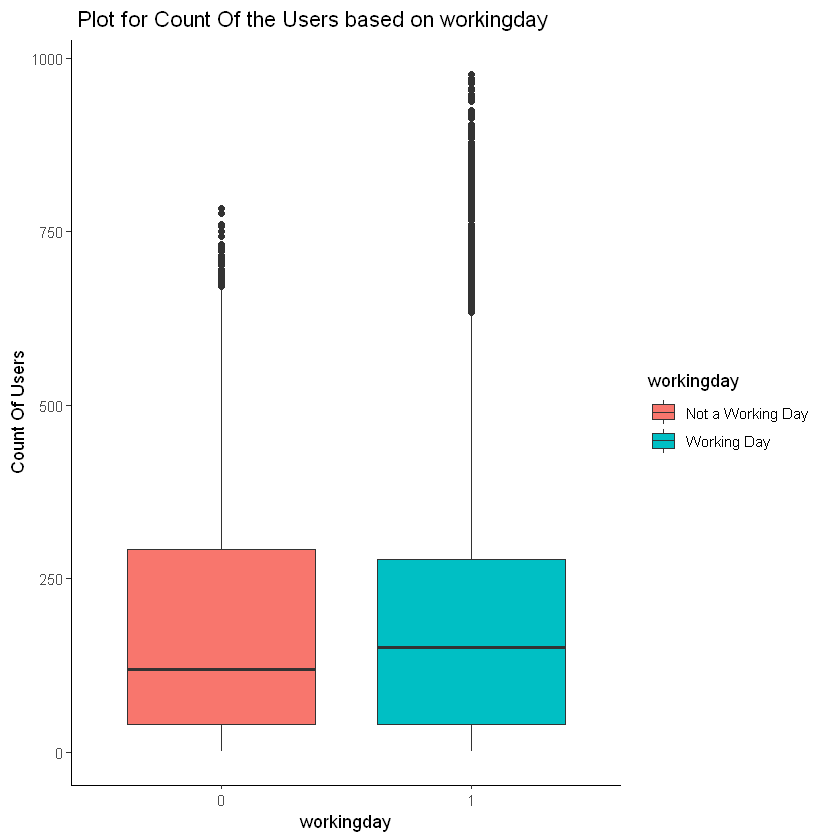

In [69]:
# The below plot shows the count of total users based on the workingday. During workingday, the outliers are more compared to non working day.

plot2 <- bike_df %>% 
  ggplot(mapping = aes(x = as.factor(workingday), 
      y = cnt,
      fill=as.factor(workingday))) + 
  geom_boxplot()  +
 labs(x = "workingday" , y = "Count Of Users", title = " Plot for Count Of the Users based on workingday") +
theme_classic() +
scale_fill_discrete(name = "workingday", labels = c("Not a Working Day", "Working Day"))
plot2

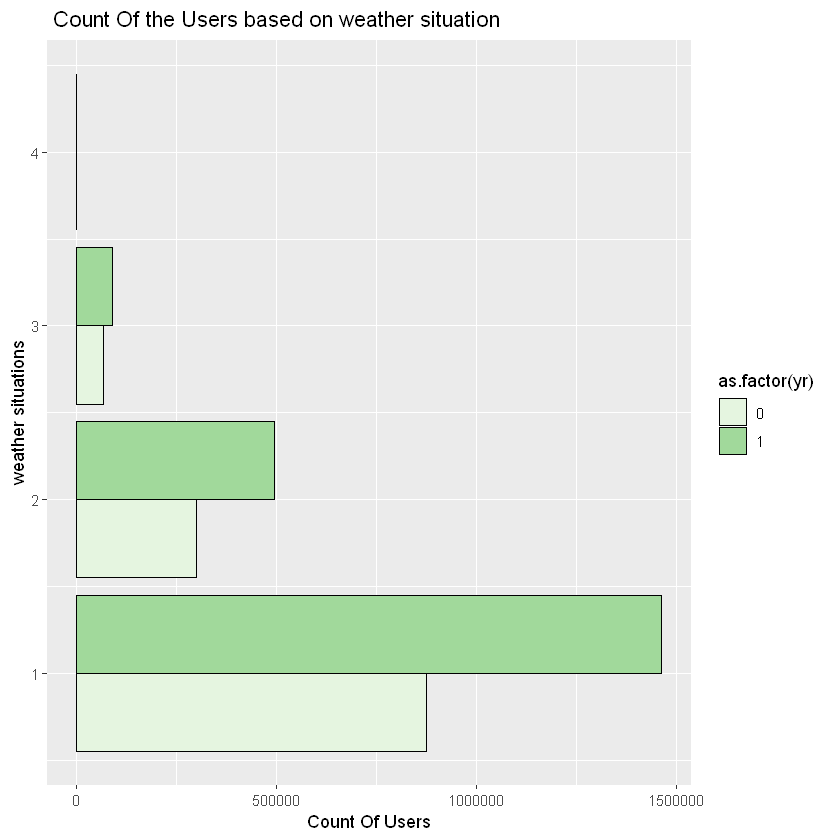

In [41]:
plot3 <- bike_df %>% 
group_by(weathersit,yr) %>% summarise(count=sum(cnt)) %>%
 ggplot(mapping = aes(x = weathersit, # your x variable
                        y = count, fill = as.factor(yr))) + # your y variable
  geom_bar(colour = "black",stat="identity", position=position_dodge()) + # plotted as points
     coord_flip() +
    labs(x = "weather situations" , y = "Count Of Users", title = " Count Of the Users based on weather situation") +
scale_fill_brewer(palette="Greens")

plot3

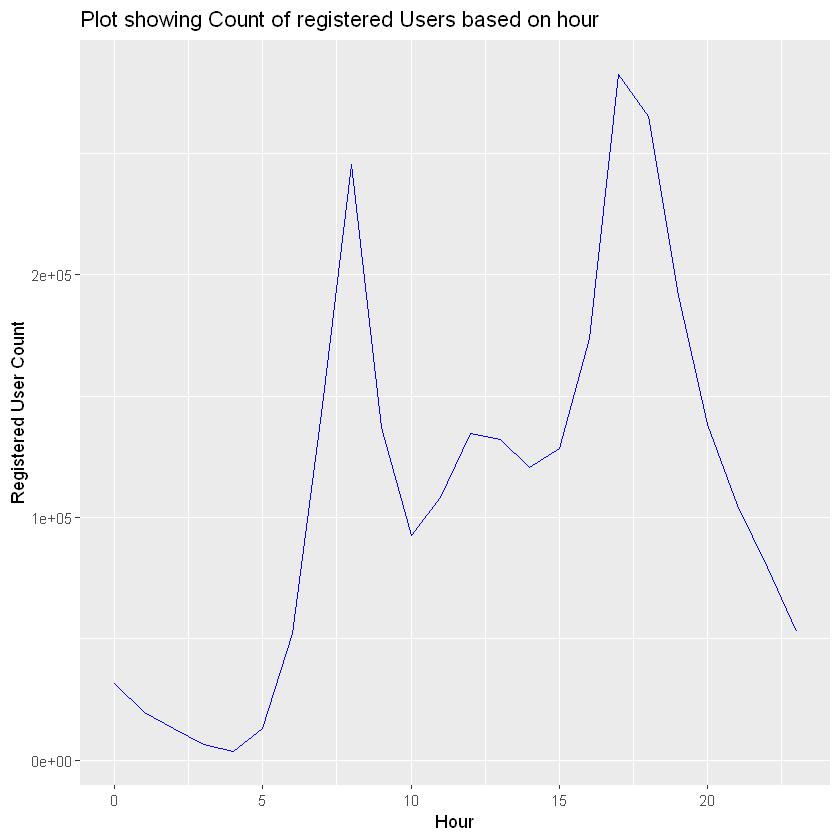

In [17]:
plot4 <- bike_df %>%
    group_by(hr) %>% summarise(count=sum(registered)) %>%
    ggplot(aes(x = hr, y = count)) +
    geom_line(colour='blue')  + 
labs(x = "Hour",y = "Registered User Count", title = "Plot showing Count of registered Users based on hour") 
plot4

### Task (g): save (5 marks)

Save your plot from Task (f) and your tidy dataset from Task (g) to disk. 

_hint_ useful functions: `write_csv()`, `ggsave()`,...

In [72]:
# Saving the plot in the file Plot
     ggsave(filename = "Plot1.png", plot1)
ggsave(filename = "Plot2.png", plot2)
ggsave(filename = "Plot3.png", plot3)
ggsave(filename = "Plot4.png", plot4)

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [6]:
# writing tidy data in csv format
Tidy_Data %>%
    write.csv(file = "TidyData.csv")

### Challenge question (10 marks)

You are the data scientist working for a bike rental company. The `hour.csv` is the data you have available. The bike rental CEO sometimes wakes up in the morning with these strange ideas, and you get to test them.

One of the key element for the company is being sure that there are always enough bikes available for the users. So, we need to understand what makes a user rent a bike and what makes a user NOT rent a bike.
Your CEO noticed thinks that one of the peak times for the registered users renting bikes is between 6am and 10am.

Task (1): make a plot to check that (take seasonality into account in the plot).

She also thought about an interesting hypothesis. A registered user usually finish working around 5pm. Between 5pm and 10pm, they notice the weather: in particular, the registered users are sensible to how good the weather is, and how stable it is. The morning after, between 6am and 10am, the amount of registered users renting a bike to go to work depends on the previous afternoon weather.

Task (2): make one or more plot to test this hypothesis (again, consider seasonality in the plot).

\[ Hints: 

#### Task1: Plottong the Registered User Count based on Hour for different seasons. We can see that the trend of the plot for all the seasons is same.

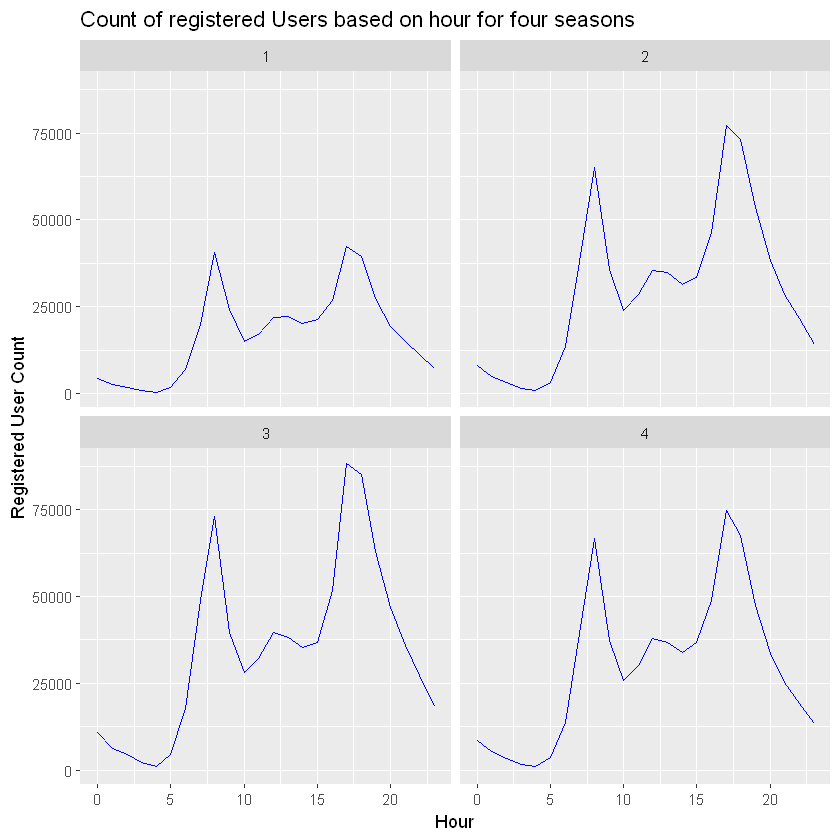

In [34]:
# In the below plot we can see there is a peak in the registered user counts between 6 am to 10 am for all the seasons as
# graph has been shown for registered users for all the four seasons.
df <-  bike_df %>%
    group_by(hr,season) %>% summarise(count=sum(registered))  

df %>%
ggplot(aes(x = hr, y = count)) + geom_line(colour='blue') +
facet_wrap(vars(season))  + 
labs(x = "Hour",y = "Registered User Count", title = "Count of registered Users based on hour for four seasons") 


#### The Plot below is not grouped by season

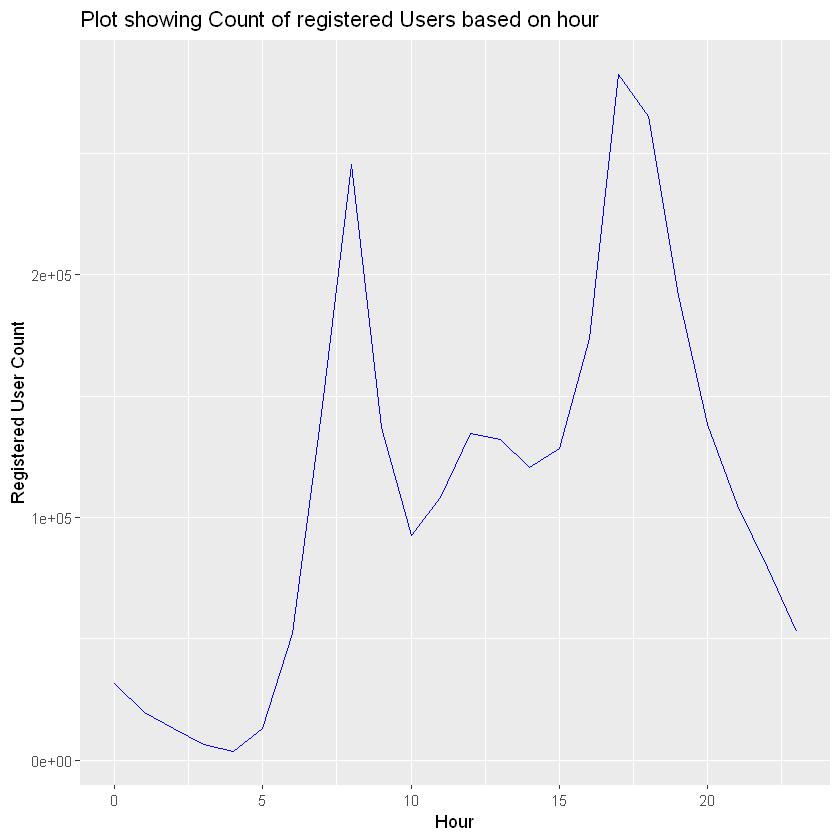

In [35]:
# Showing plot for registered user count grouping by Hour. 
bike_df_new <- bike_df %>%
    group_by(hr) %>% summarise(count=sum(registered)) %>%
    ggplot(aes(x = hr, y = count)) +
    geom_line(colour='blue')  + 
labs(x = "Hour",y = "Registered User Count", title = "Plot showing Count of registered Users based on hour") 
   
bike_df_new


#### I am calculating the Mode for the weather situation based on each date as there are multiple weather situations for a single day.

In [45]:

getMode <- function(x) {
    keys <- na.omit(unique(x))
    keys[which.max(tabulate(match(x,keys)))]
}

#### five_to_ten - this variable contains mode of the weathersit grouped by season and date and filtered as working day 1 and time frame taken is 5 pm to 10 pm as here we need weather conditions during this time frame according to the hypothesis.

In [46]:
five_to_ten <- bike_df %>%
filter(workingday == 1) %>%
filter(hr>=17 & hr<=22) %>%
group_by(dteday,season) %>%
summarise(weather = getMode(weathersit))
five_to_ten

dteday,season,weather
<fct>,<int>,<int>
2011-01-03,1,1
2011-01-04,1,1
2011-01-05,1,1
2011-01-06,1,1
2011-01-07,1,1
2011-01-10,1,1
2011-01-11,1,3
2011-01-12,1,1
2011-01-13,1,1


#### six_to_ten - this variable contains sum of the registered users grouped based on season and date. I have filtered based on working day as 1 and time frame between morning 6 am to 10 am as the count of the registered users are required for this time frame.

In [47]:
six_to_ten <- bike_df %>%
filter(workingday == 1) %>%
 filter(hr>=6 & hr<=10) %>%
group_by(dteday,season) %>%
summarise(sum = sum(registered))

# Converting into dataframe
six_to_ten_df <- as.data.frame(six_to_ten)
five_to_ten_df <- as.data.frame(five_to_ten)

# the dteday column of six_to_ten_df dataframe is being converted to date format and stored in new column named mutate_dteday_1
six_to_ten_df <- six_to_ten_df %>%
 mutate(mutate_dteday_1 = as.Date(six_to_ten_df$dteday))
six_to_ten_df

dteday,season,sum,mutate_dteday_1
<fct>,<int>,<int>,<date>
2011-01-03,1,360,2011-01-03
2011-01-04,1,440,2011-01-04
2011-01-05,1,474,2011-01-05
2011-01-06,1,505,2011-01-06
2011-01-07,1,464,2011-01-07
2011-01-10,1,413,2011-01-10
2011-01-11,1,516,2011-01-11
2011-01-12,1,312,2011-01-12
2011-01-13,1,470,2011-01-13


#### <span style="color:blue"> COMMENT: </span>
Adding a column mutate_dteday to the dataframe five_to_ten_df where increasing the date by 1. changing name of the season from 1, 2, 3, 4 as Spring, Summer, Fall and Winter. <br/> Reference: The code has been taken from r documentation - https://www.rdocumentation.org/packages/dplyr/versions/0.7.8/topics/recode

In [48]:
five_to_ten_df <- five_to_ten_df %>%
mutate(mutate_dteday = as.Date(five_to_ten_df$dteday) + 1) %>%
mutate(season=recode_factor(as.factor(season), 
                              "1"="Spring",
                              "2"="Summer",
                              "3"="Fall",
                              "4"="Winter", .ordered=TRUE))


#### Performing full join on the dataframe six_to_ten_df. The join is done based on mutate_dteday_1 column of six_to_ten_df and mutate_dteday of five_to_ten_df

In [49]:
Final_df <- full_join(six_to_ten_df, five_to_ten_df, by = c("mutate_dteday_1" = "mutate_dteday"))
# Omitting the not applicable rows
Final_df <- na.omit(Final_df)
# This table contains dteday.x column showing dteday for the registered users season.x is the column from six_to_ten_df whereas dteday.y and season.y
# are column from dataframe five_to_ten_df. mutate_dteday_1 is the column from dataframe six_to_ten_df. As we can see now, in a row I have current date for registered users and weather situation for previous day in a row. 
Final_df

,dteday.x,season.x,sum,mutate_dteday_1,dteday.y,season.y,weather
,<fct>,<int>,<int>,<date>,<fct>,<ord>,<int>
2,2011-01-04,1,440,2011-01-04,2011-01-03,Spring,1
3,2011-01-05,1,474,2011-01-05,2011-01-04,Spring,1
4,2011-01-06,1,505,2011-01-06,2011-01-05,Spring,1
5,2011-01-07,1,464,2011-01-07,2011-01-06,Spring,1
7,2011-01-11,1,516,2011-01-11,2011-01-10,Spring,1
8,2011-01-12,1,312,2011-01-12,2011-01-11,Spring,3
9,2011-01-13,1,470,2011-01-13,2011-01-12,Spring,1
10,2011-01-14,1,400,2011-01-14,2011-01-13,Spring,1
11,2011-01-19,1,470,2011-01-19,2011-01-18,Spring,2


### COMMENT : Plot Explaination:
The below plot is showing count of the registered users on current date with respect to the weather situation of the previous date. The plots are divided based on different seasons and we see that for all the seasons, it is following the same trend. For weather situation Clear, Few clouds, Partly cloudy, Partly cloudy on the previous day, we can see that the registrered users count for next day is maximum. However, as registered users are sensible for the weather situation 4- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog , we find no registered users taking the rental bikes on the next day. In the below plot we are not able to see any value for the weather situation of type 4 as we are taking the mode of the weather for each day between the hour 5pm to 10pm, and on taking mode we find there are no weather situation with type 4 for a particular day. I took mode as I feel taking sum, median or average would not make sense in this case.

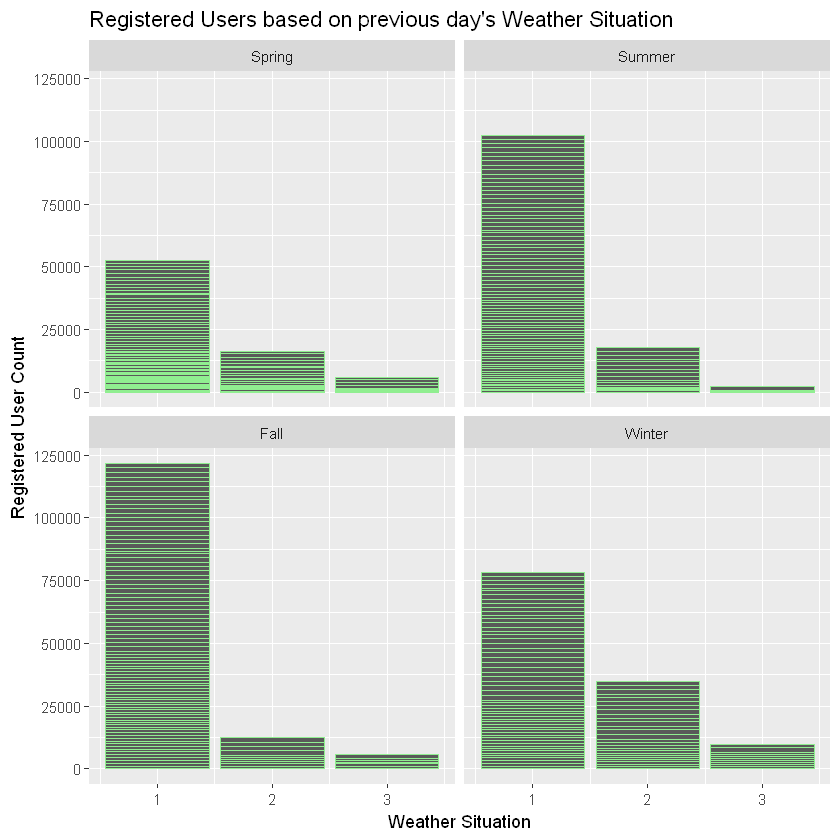

In [59]:

Final_df %>%
ggplot(aes(x = weather, y = sum)) +
    geom_bar(stat="identity",colour="lightgreen") +
facet_wrap(vars(season.y))   + 
labs(x = "Weather Situation",y = "Registered User Count", title = "Registered Users based on previous day's Weather Situation") 

#### Checking the count of registered users based on weather situation grouping by date. For this I am taking the mode of the weather situation for each date.

In [51]:
mutate_bike_df <- bike_df %>% 
group_by(dteday) %>%
summarise(weather = getMode(weathersit), registered = sum(registered), season = getMode(season))

mutate_bike_df




dteday,weather,registered,season
<fct>,<int>,<int>,<int>
2011-01-01,1,654,1
2011-01-02,2,670,1
2011-01-03,1,1229,1
2011-01-04,1,1454,1
2011-01-05,1,1518,1
2011-01-06,1,1518,1
2011-01-07,2,1362,1
2011-01-08,1,891,1
2011-01-09,1,768,1


In [206]:
# grouping by weather situation. This shows that more registered users if weathersit is 1 or 2. Comparatively less users if weathersit is 3 or 4
bike_df %>%
    group_by(weathersit)  %>%
summarise(sum = sum(registered))

weathersit,sum
<int>,<int>
1,1875428
2,661471
3,135548
4,215
